In [2]:
import fitsio
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

import astropy.table as Table
from astropy.io import fits

# Re-running of the KP6

In [27]:
files_path = "/pscratch/sd/p/physedw/redoKP6"

# Create a dictionary to store all your data
deltas = {
    'ciii': fits.open(f'{files_path}/deltas/delta-ciii/Log/delta_attributes.fits.gz'),
    'lya': fits.open(f'{files_path}/deltas/delta-lya/Log/delta_attributes.fits.gz'),
    'lyb': fits.open(f'{files_path}/deltas/delta-lyb/Log/delta_attributes.fits.gz')
}

# Now you can access them easily:
print("Lya info:")
deltas['lya'].info()

print("\nLyb info:")
deltas['lyb'].info()

print("\nCIII info:")
deltas['ciii'].info()

Lya info:
Filename: /pscratch/sd/p/physedw/redoKP6/deltas/delta-lya/Log/delta_attributes.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  STACK_DELTAS    1 BinTableHDU     20   2716R x 3C   [D, D, D]   
  2  VAR_FUNC      1 BinTableHDU     25   20R x 6C   [D, D, D, D, J, L]   
  3  CONT          1 BinTableHDU     20   207R x 3C   [D, D, D]   
  4  FIT_METADATA    1 BinTableHDU     24   447334R x 6C   [K, D, D, D, K, L]   

Lyb info:
Filename: /pscratch/sd/p/physedw/redoKP6/deltas/delta-lyb/Log/delta_attributes.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  STACK_DELTAS    1 BinTableHDU     20   2716R x 3C   [D, D, D]   
  2  VAR_FUNC      1 BinTableHDU     25   20R x 6C   [D, D, D, D, J, L]   
  3  CONT          1 BinTableHDU     20   126R x 3C   [D, D, D]   
  4  FIT_METADATA    1 BinTableHDU     24   146287R x 6C   [K, D, D, D, K,

In [30]:
# Exploring the contents of the lya .fits
print('--- PRIMARY HEADER ---\n')
for key, value in deltas['lya'][0].header.items():
        print(f"{key:12} : {value}")

for i in range(len(deltas['lya'])):
    hdu = deltas['lya'][i]
    print(f"\n--- {hdu.name} (HDU {i}) ---")
    
    if hasattr(hdu, 'columns') and hdu.columns is not None:
        print(f"Shape: {hdu.data.shape}")
        print("Columns:")
        for col_name in hdu.columns.names:
            col = hdu.columns[col_name]
            print(f"  - {col_name}: format={col.format}, unit={col.unit}")

--- PRIMARY HEADER ---

SIMPLE       : True
BITPIX       : 16
NAXIS        : 0
EXTEND       : True
COMMENT      :   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT      :   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H

--- PRIMARY (HDU 0) ---

--- STACK_DELTAS (HDU 1) ---
Shape: (2716,)
Columns:
  - LOGLAM: format=D, unit=log(Angstrom)
  - STACK: format=D, unit=None
  - WEIGHT: format=D, unit=None

--- VAR_FUNC (HDU 2) ---
Shape: (20,)
Columns:
  - LOGLAM: format=D, unit=log(Angstrom)
  - ETA: format=D, unit=None
  - VAR_LSS: format=D, unit=None
  - FUDGE: format=D, unit=None
  - NUM_PIXELS: format=J, unit=None
  - VALID_FIT: format=L, unit=None

--- CONT (HDU 3) ---
Shape: (207,)
Columns:
  - LOGLAM_REST: format=D, unit=log(Angstrom)
  - MEAN_CONT: format=D, unit=10**-17 erg/(s cm2 Angstrom)
  - WEIGHT: format=D, unit=None

--- FIT_METADATA (HDU 4) ---
Shape: (447334,)
Columns:
  - LOS_ID: format=K, unit=None
  - ZERO_POINT: form

Delta CIII:
  Wavelength range: 3600.0 Å to 5772.0 Å
  Flux range: 0.957 to 1.053

Delta LYA:
  Wavelength range: 3600.0 Å to 5772.0 Å
  Flux range: 0.967 to 1.032

Delta LYB:
  Wavelength range: 3600.0 Å to 5772.0 Å
  Flux range: 0.190 to 1.491



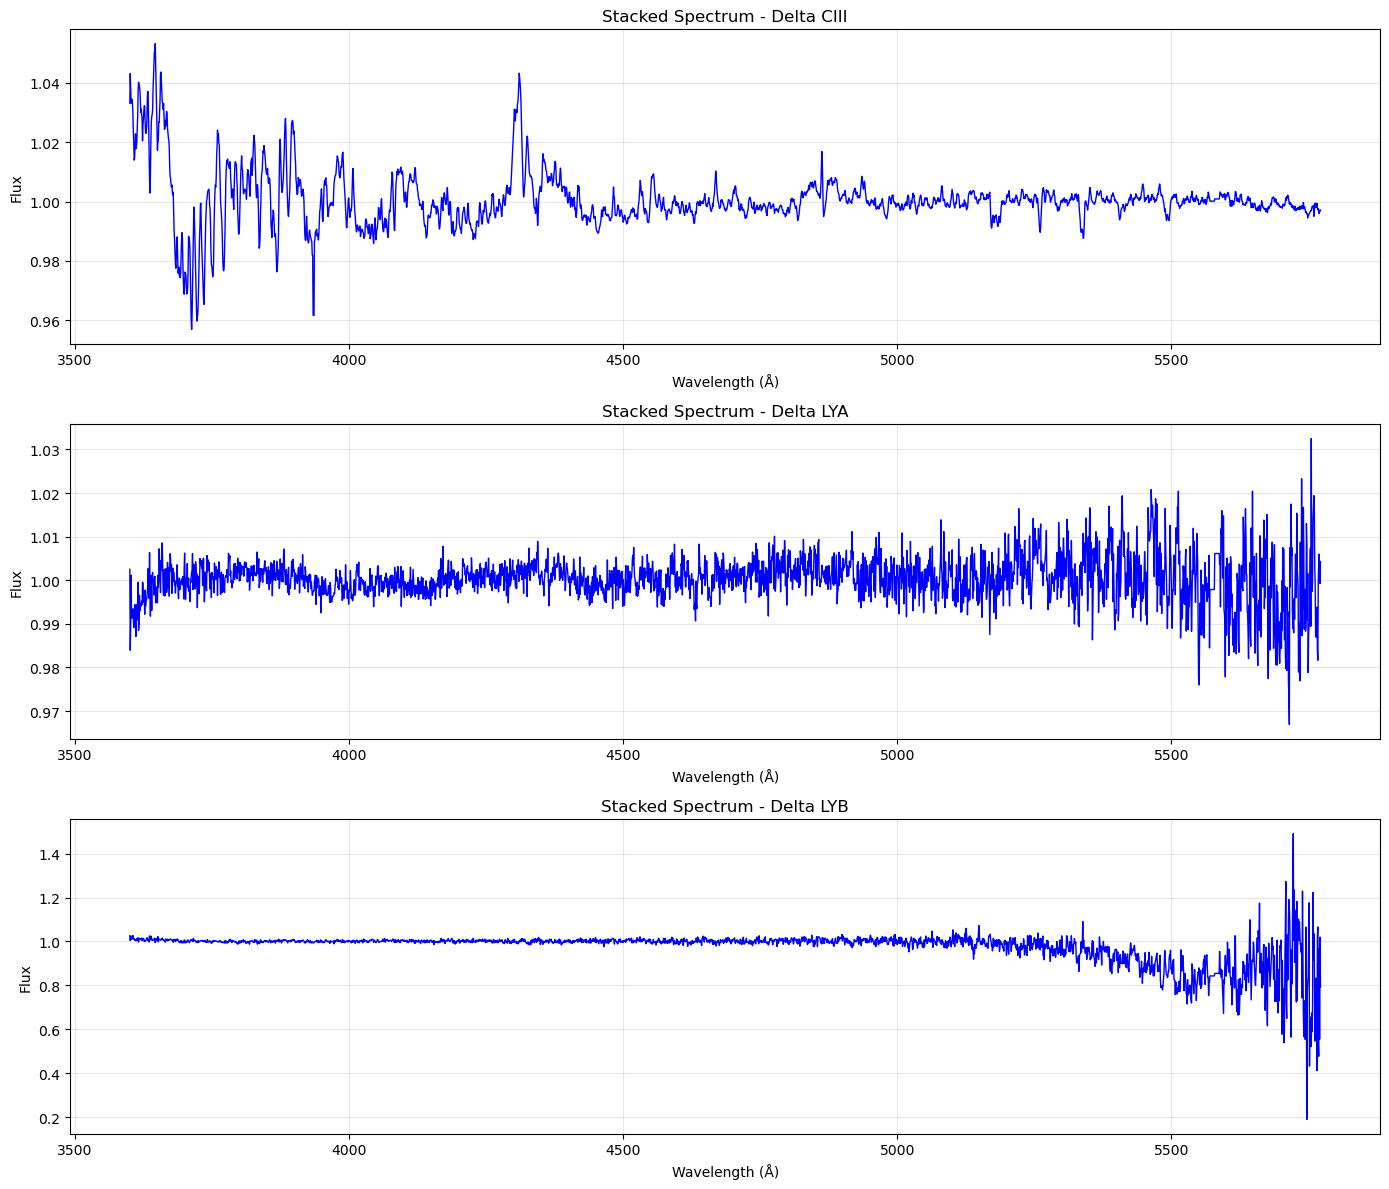

In [31]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, (name, hdul) in enumerate(deltas.items()):
    # Convert log wavelength back to linear wavelength for plotting
    loglam = hdul['STACK_DELTAS'].data['LOGLAM']
    wavelength = 10**loglam  # Convert from log to linear Angstroms
    flux = hdul['STACK_DELTAS'].data['STACK']
    
    axes[idx].plot(wavelength, flux, linewidth=1, color='blue')
    axes[idx].set_xlabel('Wavelength (Å)')
    axes[idx].set_ylabel('Flux')
    axes[idx].set_title(f'Stacked Spectrum - Delta {name.upper()}')
    axes[idx].grid(True, alpha=0.3)
    
    # Print data range for each
    print(f"Delta {name.upper()}:")
    print(f"  Wavelength range: {wavelength[0]:.1f} Å to {wavelength[-1]:.1f} Å")
    print(f"  Flux range: {np.min(flux):.3f} to {np.max(flux):.3f}")
    print()

plt.tight_layout()
plt.show()

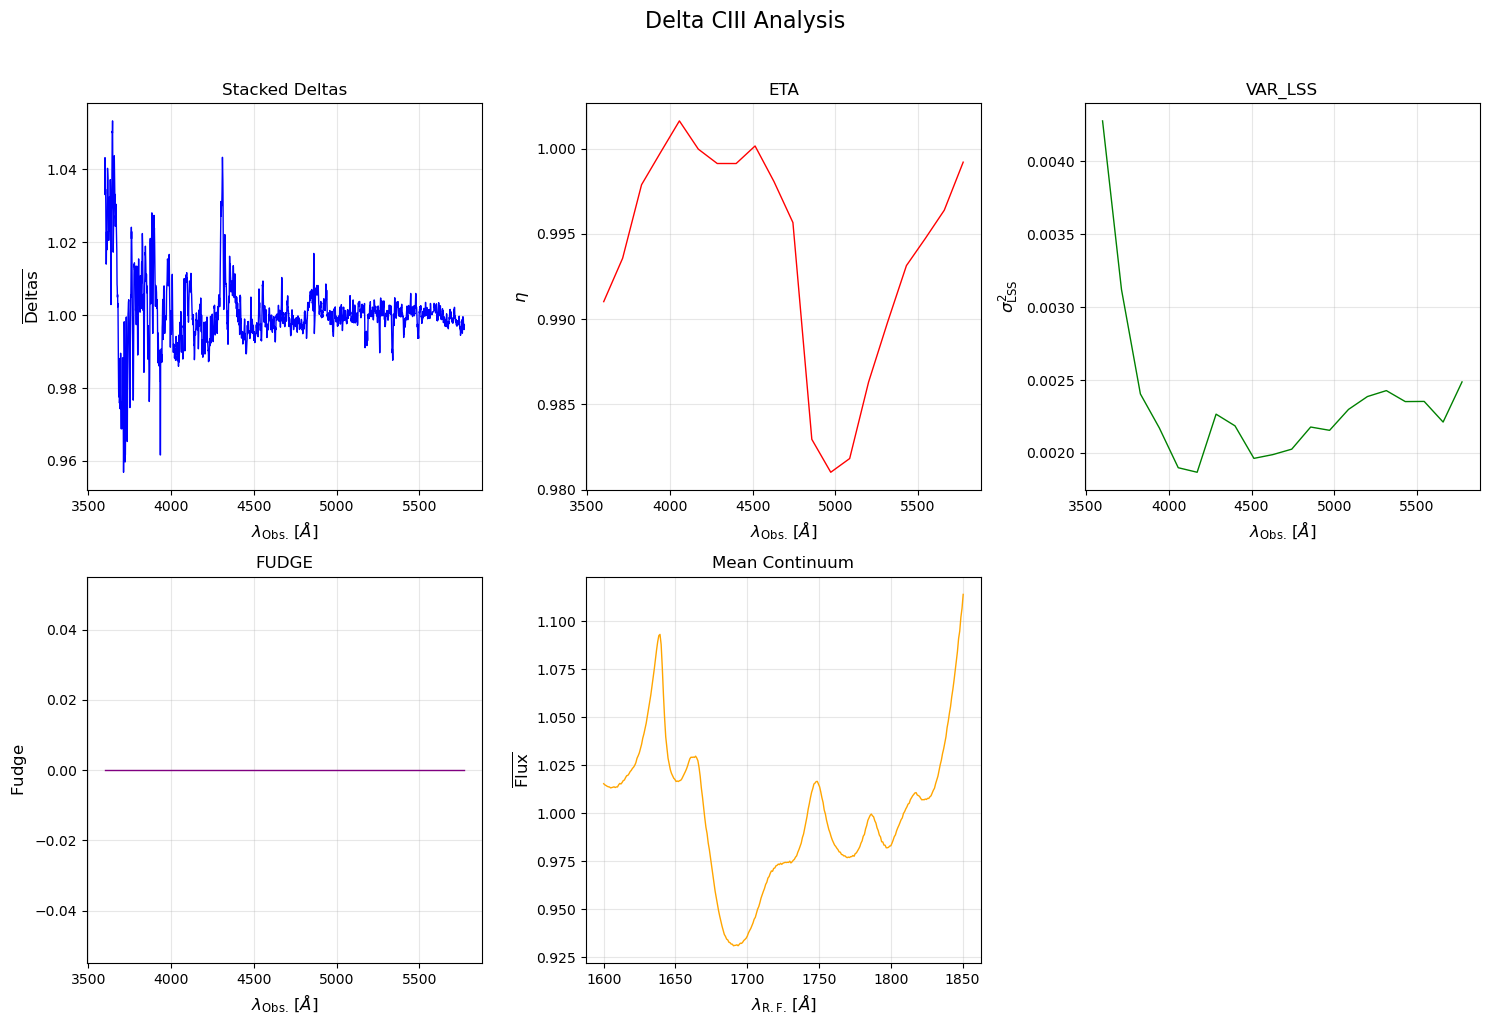

=== Delta CIII Summary ===
Stacked Deltas range: 0.957 to 1.053
ETA range: 0.981 to 1.002
VAR_LSS range: 0.002 to 0.004
FUDGE range: 0.000e+00 to 0.000e+00
Mean Continuum range: 0.931 to 1.114



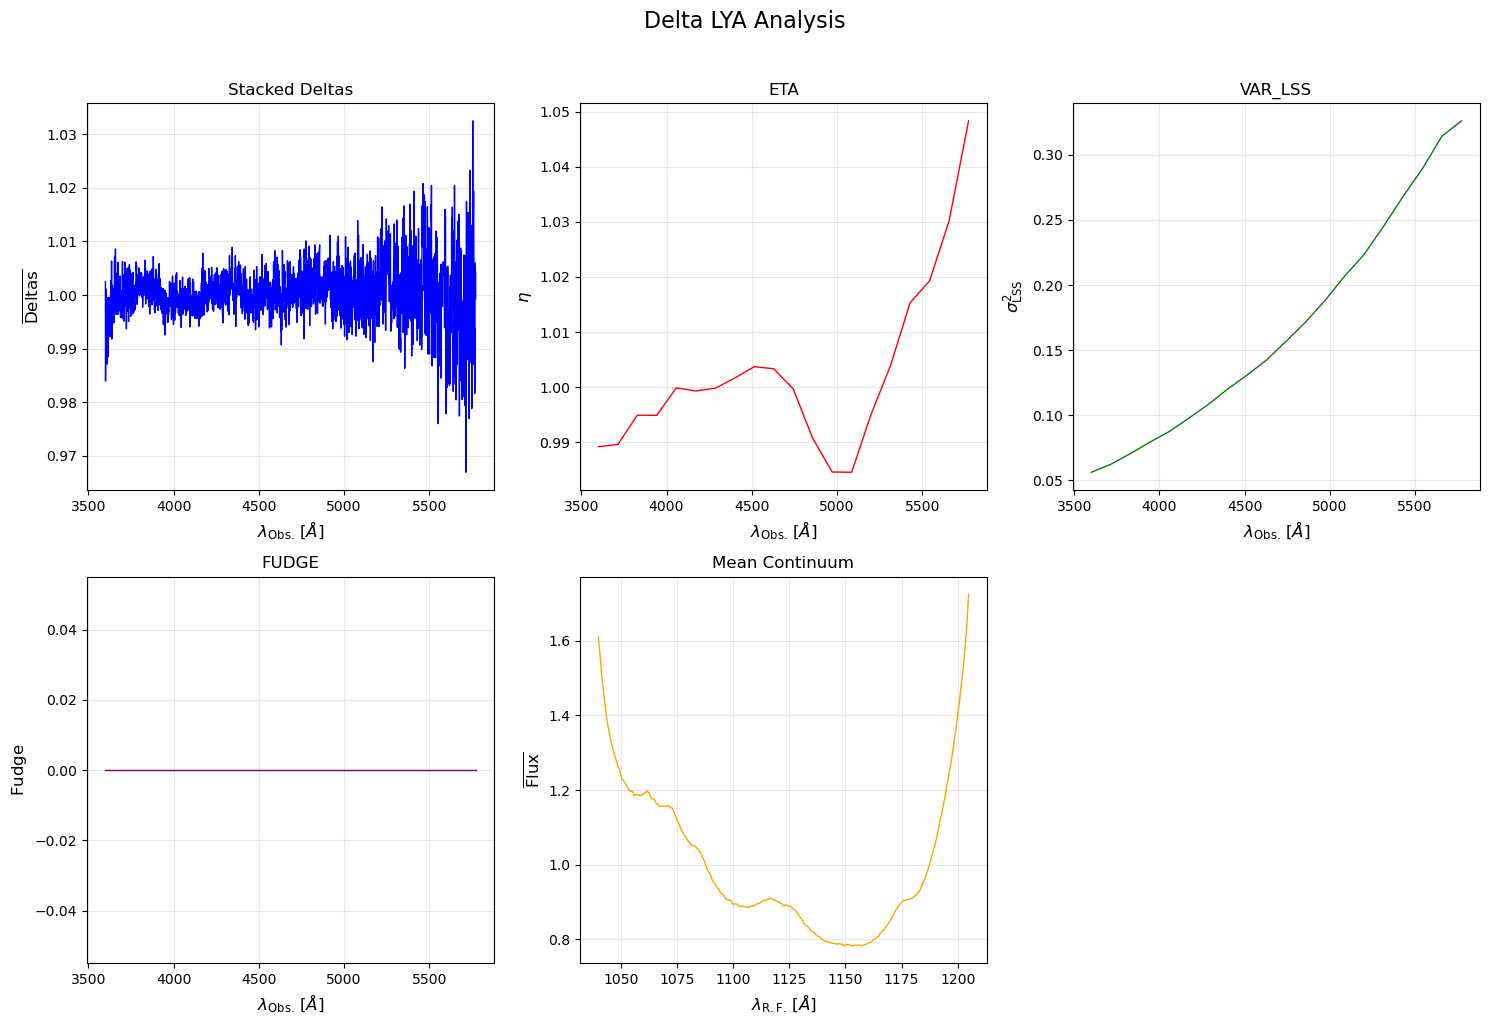

=== Delta LYA Summary ===
Stacked Deltas range: 0.967 to 1.032
ETA range: 0.985 to 1.048
VAR_LSS range: 0.056 to 0.326
FUDGE range: 0.000e+00 to 0.000e+00
Mean Continuum range: 0.783 to 1.725



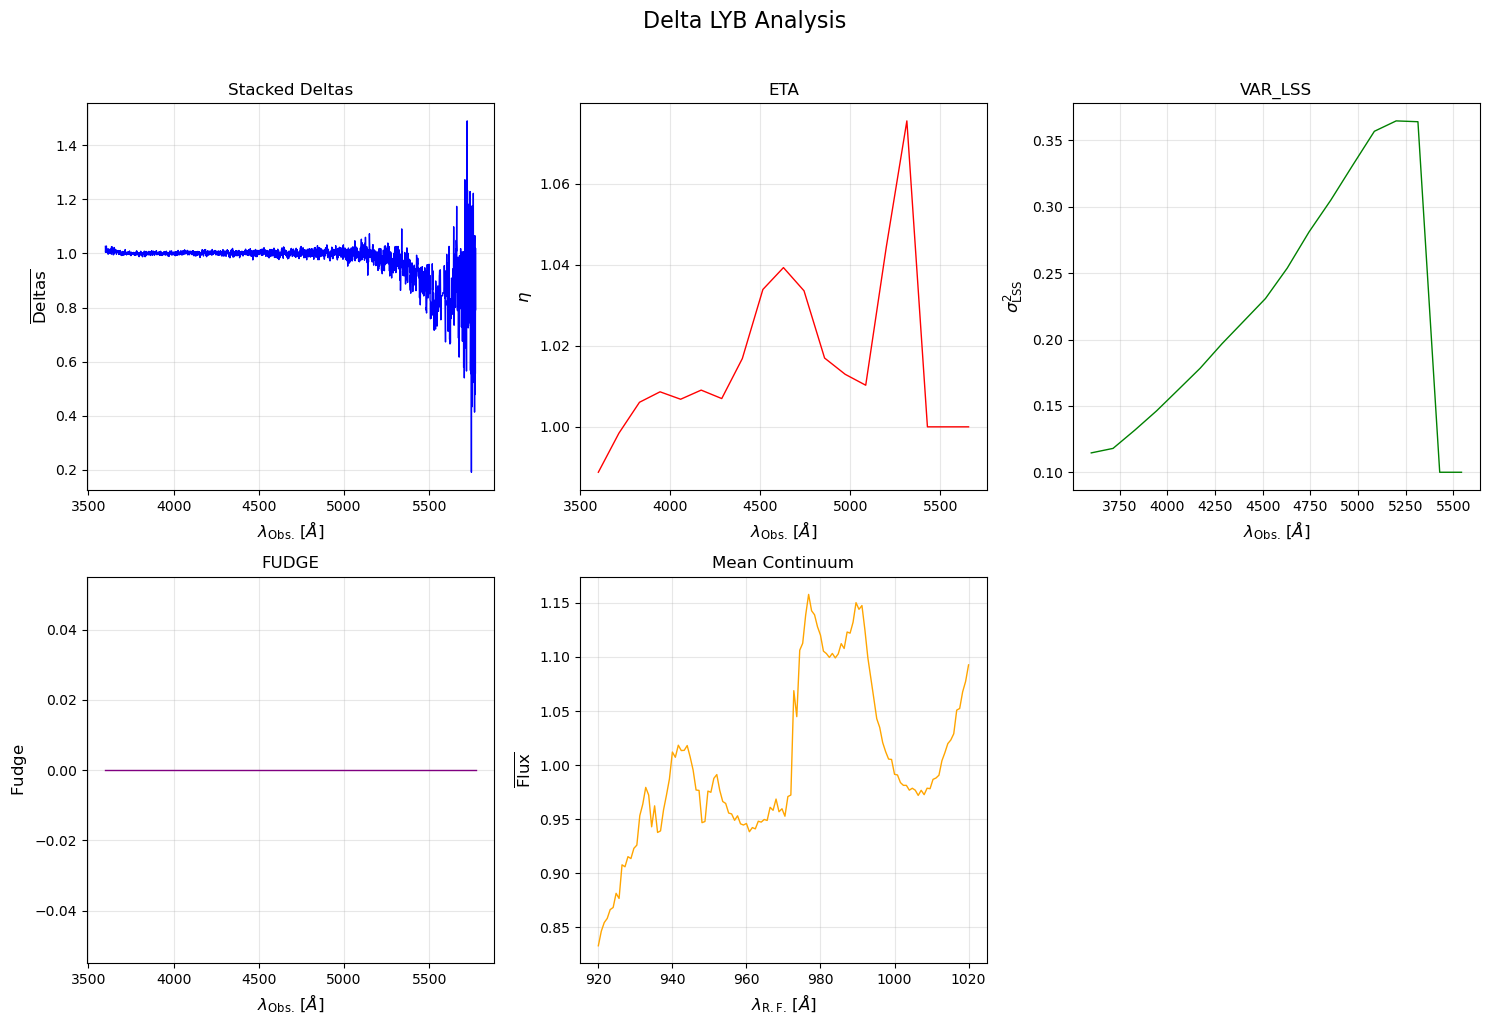

=== Delta LYB Summary ===
Stacked Deltas range: 0.190 to 1.491
ETA range: 0.989 to 1.076
VAR_LSS range: 0.100 to 0.365
FUDGE range: 0.000e+00 to 0.000e+00
Mean Continuum range: 0.833 to 1.158



In [32]:
# Create subplots for each delta
for name, hdul in deltas.items():
    # Create the same subplot structure for each delta
    f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axs[-1, -1].axis('off')
    
    # Set the main title for the entire figure
    f.suptitle(f'Delta {name.upper()} Analysis', fontsize=16, y=1.02)

    ### Stack Delta Plot
    loglam = hdul['STACK_DELTAS'].data['LOGLAM'][:]
    stack  = hdul['STACK_DELTAS'].data['STACK'][:]
    cut = (stack != 0.) & (hdul['STACK_DELTAS'].data['WEIGHT'][:] > 0.)
    loglam = loglam[cut]
    stack  = stack[cut]
    axs[0][0].plot(10.**loglam, stack, linewidth=1, color='blue')
    axs[0][0].grid(alpha=0.3)
    axs[0][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[0][0].set_ylabel(r'$\mathrm{\overline{Deltas}}$', fontsize=12)
    axs[0][0].set_title('Stacked Deltas')

    ### ETA Plot
    loglam    = hdul['VAR_FUNC'].data['LOGLAM'][:]
    eta       = hdul['VAR_FUNC'].data['ETA'][:]
    nb_pixels = hdul['VAR_FUNC'].data['NUM_PIXELS'][:]
    cut = (nb_pixels > 0.) & (eta != 1.)
    loglam = loglam[cut]
    eta    = eta[cut]
    axs[0][1].plot(10.**loglam, eta, linewidth=1, color='red')
    axs[0][1].grid(alpha=0.3)
    axs[0][1].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[0][1].set_ylabel(r'$\eta$', fontsize=12)
    axs[0][1].set_title('ETA')

    ### VAR_LSS Plot
    loglam    = hdul['VAR_FUNC'].data['LOGLAM'][:]
    var_lss   = hdul['VAR_FUNC'].data['VAR_LSS'][:]
    nb_pixels = hdul['VAR_FUNC'].data['NUM_PIXELS'][:]
    cut       = (nb_pixels > 0.) & (var_lss != 0.1)
    loglam    = loglam[cut]
    var_lss   = var_lss[cut]
    axs[0][2].plot(10.**loglam, var_lss, linewidth=1, color='green')
    axs[0][2].grid(alpha=0.3)
    axs[0][2].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[0][2].set_ylabel(r'$\sigma^{2}_{\mathrm{LSS}}$', fontsize=12)
    axs[0][2].set_title('VAR_LSS')

    ### FUDGE Plot
    loglam    = hdul['VAR_FUNC'].data['LOGLAM'][:]
    fudge     = hdul['VAR_FUNC'].data['FUDGE'][:]
    nb_pixels = hdul['VAR_FUNC'].data['NUM_PIXELS'][:]
    cut       = (nb_pixels > 0.) & (fudge != 1.e-7)
    loglam    = loglam[cut]
    fudge     = fudge[cut]
    axs[1][0].plot(10.**loglam, fudge, linewidth=1, color='purple')
    axs[1][0].grid(alpha=0.3)
    axs[1][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
    axs[1][0].set_ylabel(r'$\mathrm{Fudge}$', fontsize=12)
    axs[1][0].set_title('FUDGE')

    ### Mean Continuum Plot
    loglam_rest = hdul['CONT'].data['LOGLAM_REST'][:]
    mean_cont   = hdul['CONT'].data['MEAN_CONT'][:]
    cut = (mean_cont != 0.) & (hdul['CONT'].data['WEIGHT'][:] > 0.)
    loglam_rest = loglam_rest[cut]
    mean_cont   = mean_cont[cut]
    axs[1][1].plot(10.**loglam_rest, mean_cont, linewidth=1, color='orange')
    axs[1][1].grid(alpha=0.3)
    axs[1][1].set_xlabel(r'$\lambda_{\mathrm{R.F.}} \, [\AA]$', fontsize=12)
    axs[1][1].set_ylabel(r'$\mathrm{\overline{Flux}}$', fontsize=12)
    axs[1][1].set_title('Mean Continuum')

    plt.tight_layout()
    plt.show()
    
    # Print some info about each delta
    print(f"=== Delta {name.upper()} Summary ===")
    print(f"Stacked Deltas range: {np.min(stack):.3f} to {np.max(stack):.3f}")
    print(f"ETA range: {np.min(eta):.3f} to {np.max(eta):.3f}")
    print(f"VAR_LSS range: {np.min(var_lss):.3f} to {np.max(var_lss):.3f}")
    print(f"FUDGE range: {np.min(fudge):.3e} to {np.max(fudge):.3e}")
    print(f"Mean Continuum range: {np.min(mean_cont):.3f} to {np.max(mean_cont):.3f}")
    print()

# Close all FITS files when done
for hdul in deltas.values():
    hdul.close()

# Comparisson to Baseline Results

In [33]:
files_path = "/global/cfs/cdirs/desi/science/lya/y1-kp6/iron-baseline"

# Create a dictionary to store all your data
deltasKP6 = {
    'ciii': fits.open(f'{files_path}/deltas/delta-ciii-0-0/Log/delta_attributes.fits.gz'),
    'lya': fits.open(f'{files_path}/deltas/delta-lya-0-0/Log/delta_attributes.fits.gz'),
    'lyb': fits.open(f'{files_path}/deltas/delta-lyb-0-0/Log/delta_attributes.fits.gz')
}

# Now you can access them easily:
print("Lya info:")
deltasKP6['lya'].info()

print("\nLyb info:")
deltasKP6['lyb'].info()

print("\nCIII info:")
deltasKP6['ciii'].info()

Lya info:
Filename: /global/cfs/cdirs/desi/science/lya/y1-kp6/iron-baseline/deltas/delta-lya-0-0/Log/delta_attributes.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  STACK_DELTAS    1 BinTableHDU     20   2716R x 3C   [D, D, D]   
  2  VAR_FUNC      1 BinTableHDU     25   20R x 6C   [D, D, D, D, J, L]   
  3  CONT          1 BinTableHDU     20   207R x 3C   [D, D, D]   
  4  FIT_METADATA    1 BinTableHDU     24   447334R x 6C   [K, D, D, D, K, L]   

Lyb info:
Filename: /global/cfs/cdirs/desi/science/lya/y1-kp6/iron-baseline/deltas/delta-lyb-0-0/Log/delta_attributes.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  STACK_DELTAS    1 BinTableHDU     20   2716R x 3C   [D, D, D]   
  2  VAR_FUNC      1 BinTableHDU     25   20R x 6C   [D, D, D, D, J, L]   
  3  CONT          1 BinTableHDU     20   126R x 3C   [D, D, D]   
  4  FIT_METADAT

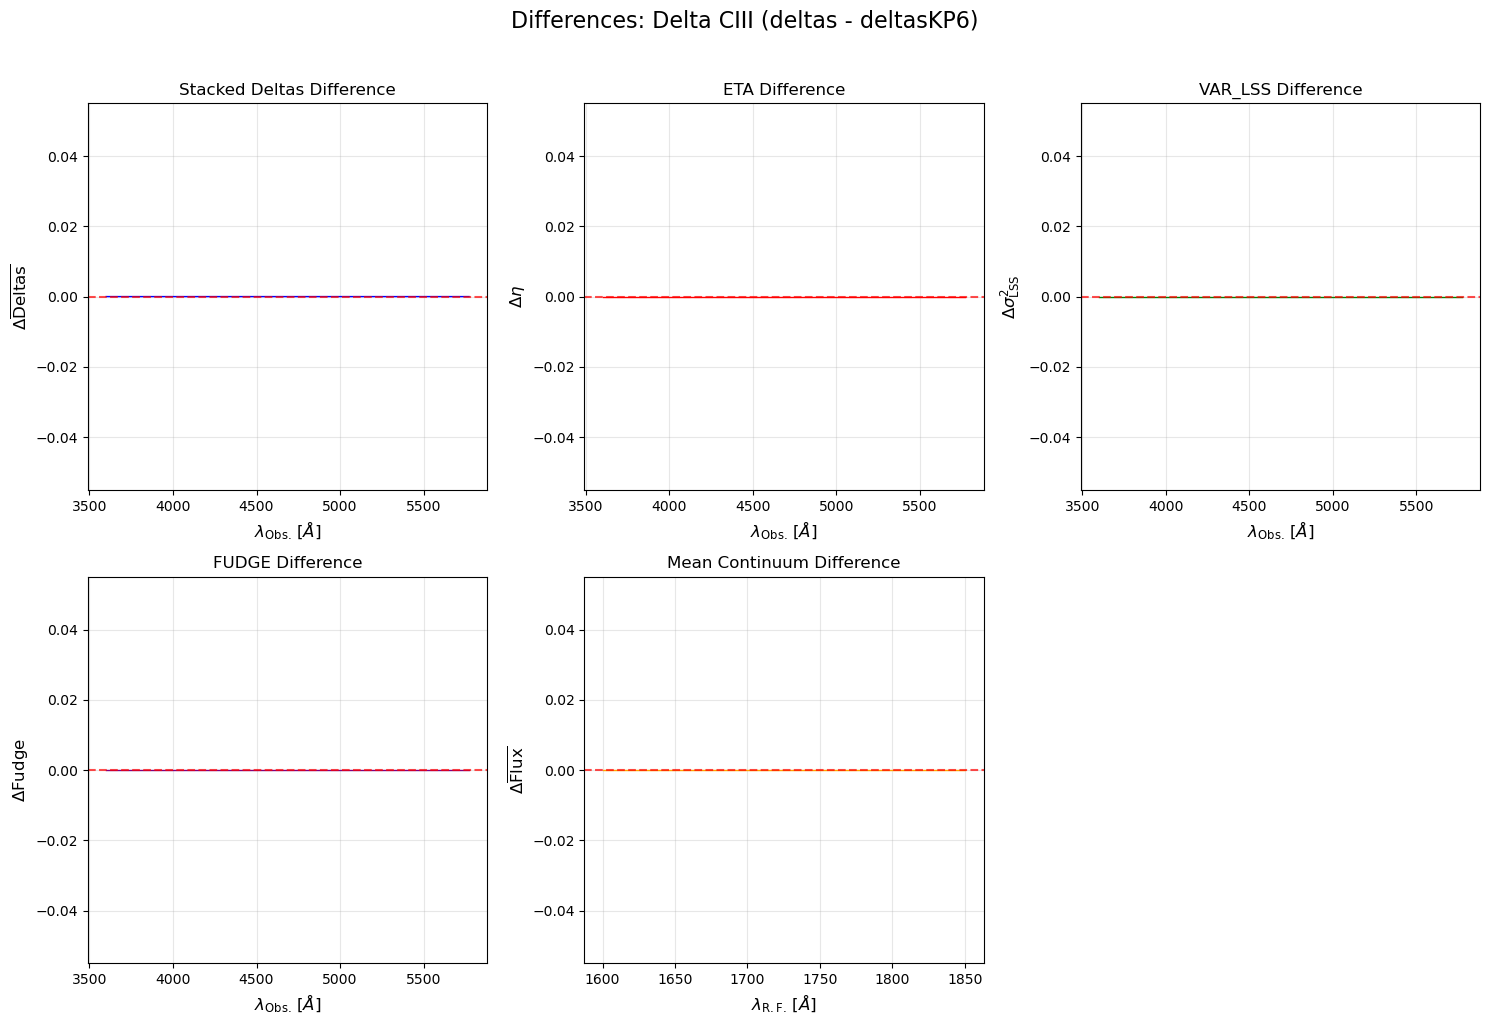

=== Delta CIII Difference Statistics ===
Stacked Deltas diff - Mean: 0.000e+00, Std: 0.000e+00


<Figure size 640x480 with 0 Axes>

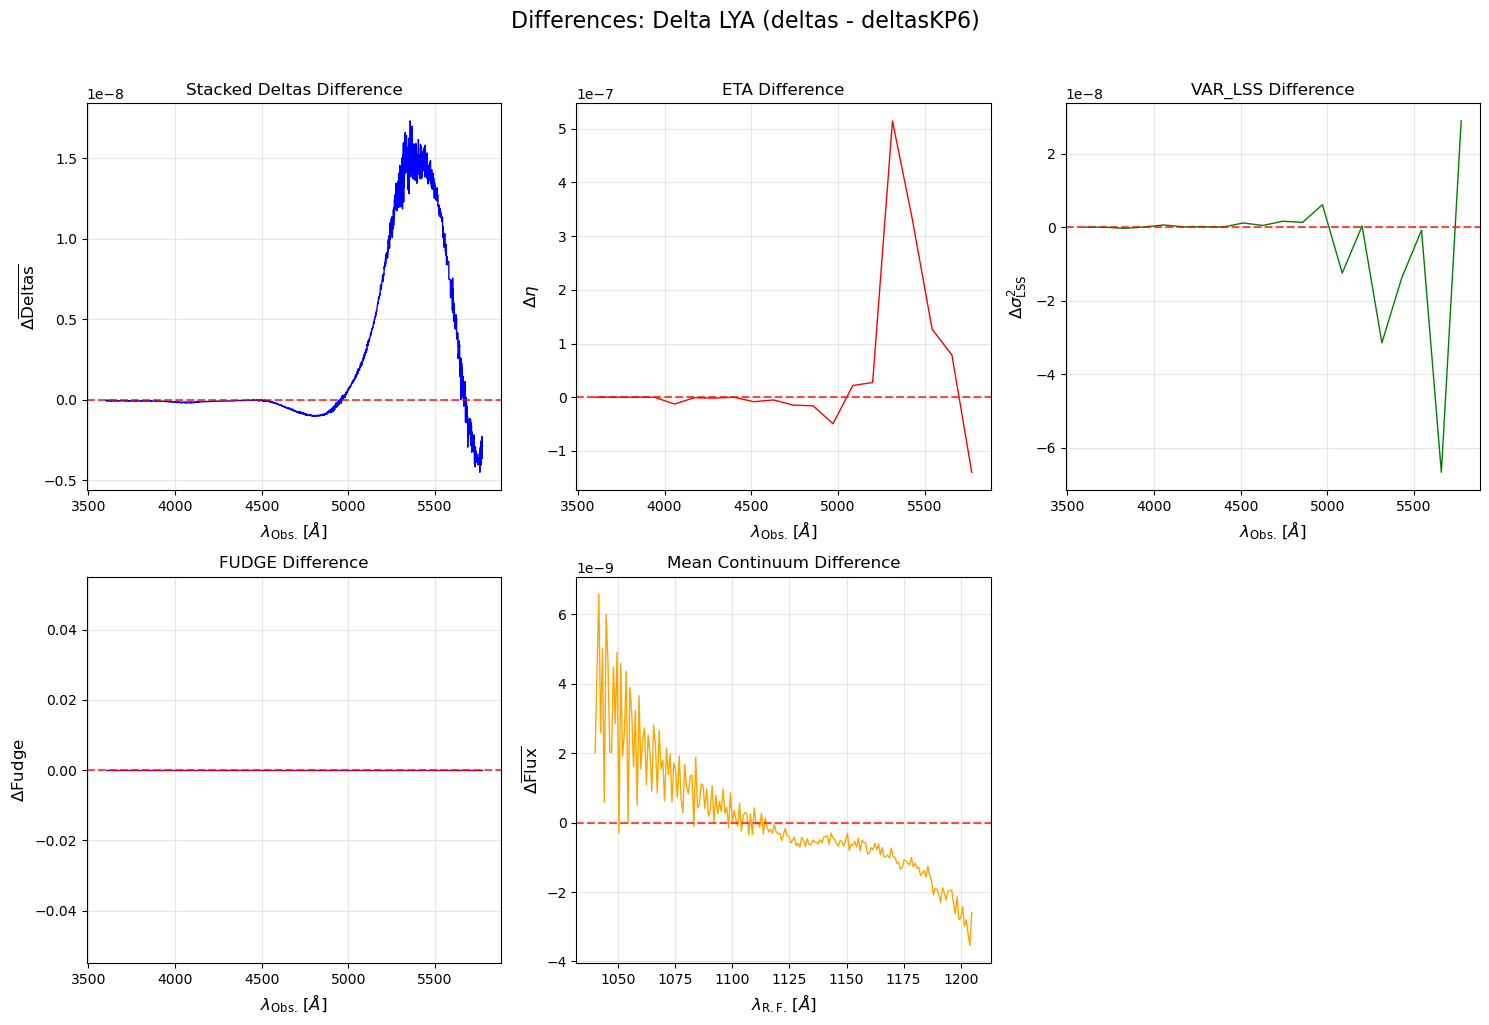

=== Delta LYA Difference Statistics ===
Stacked Deltas diff - Mean: 7.938e-11, Std: 1.708e-09


<Figure size 640x480 with 0 Axes>

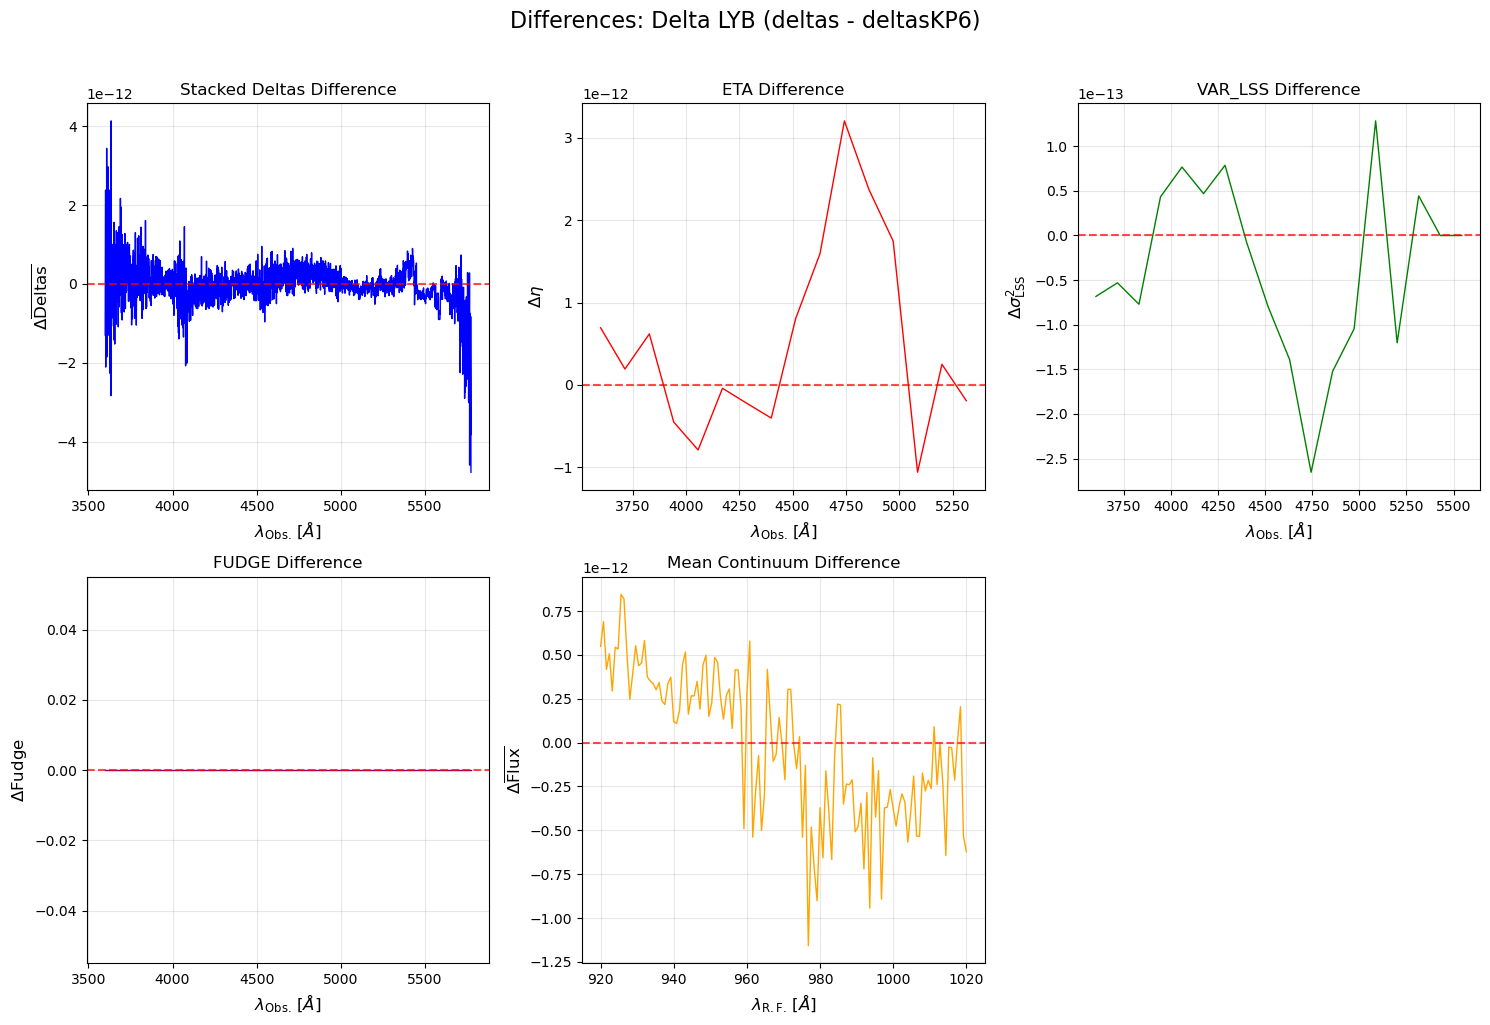

=== Delta LYB Difference Statistics ===
Stacked Deltas diff - Mean: -1.793e-14, Std: 4.133e-13


<Figure size 640x480 with 0 Axes>

In [35]:
# Plot differences between deltas and deltasKP6 for all three types
for name in deltas.keys():
    if name in deltasKP6:  # Ensure the same delta exists in both dictionaries
        # Create the same subplot structure for differences
        f, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
        axs[-1, -1].axis('off')
        
        # Set the main title for the entire figure
        f.suptitle(f'Differences: Delta {name.upper()} (deltas - deltasKP6)', fontsize=16, y=1.02)

        # Get both HDU lists
        hdul_orig = deltas[name]
        hdul_KP6 = deltasKP6[name]

        ### Stack Delta Difference Plot
        loglam_orig = hdul_orig['STACK_DELTAS'].data['LOGLAM'][:]
        stack_orig = hdul_orig['STACK_DELTAS'].data['STACK'][:]
        cut_orig = (stack_orig != 0.) & (hdul_orig['STACK_DELTAS'].data['WEIGHT'][:] > 0.)
        
        loglam_KP6 = hdul_KP6['STACK_DELTAS'].data['LOGLAM'][:]
        stack_KP6 = hdul_KP6['STACK_DELTAS'].data['STACK'][:]
        cut_KP6 = (stack_KP6 != 0.) & (hdul_KP6['STACK_DELTAS'].data['WEIGHT'][:] > 0.)
        
        # Find common wavelength range
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_KP6[cut_KP6])
        
        if len(common_loglam) > 0:
            # Get values at common wavelengths
            orig_vals = stack_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            KP6_vals = stack_KP6[cut_KP6][np.isin(loglam_KP6[cut_KP6], common_loglam)]
            difference = orig_vals - KP6_vals
            
            axs[0][0].plot(10.**common_loglam, difference, linewidth=1, color='blue')
            axs[0][0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[0][0].grid(alpha=0.3)
            axs[0][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[0][0].set_ylabel(r'$\Delta \mathrm{\overline{Deltas}}$', fontsize=12)
            axs[0][0].set_title('Stacked Deltas Difference')

        ### ETA Difference Plot
        loglam_orig = hdul_orig['VAR_FUNC'].data['LOGLAM'][:]
        eta_orig = hdul_orig['VAR_FUNC'].data['ETA'][:]
        nb_pixels_orig = hdul_orig['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_orig = (nb_pixels_orig > 0.) & (eta_orig != 1.)
        
        loglam_KP6 = hdul_KP6['VAR_FUNC'].data['LOGLAM'][:]
        eta_KP6 = hdul_KP6['VAR_FUNC'].data['ETA'][:]
        nb_pixels_KP6 = hdul_KP6['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_KP6 = (nb_pixels_KP6 > 0.) & (eta_KP6 != 1.)
        
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_KP6[cut_KP6])
        
        if len(common_loglam) > 0:
            orig_vals = eta_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            KP6_vals = eta_KP6[cut_KP6][np.isin(loglam_KP6[cut_KP6], common_loglam)]
            difference = orig_vals - KP6_vals
            
            axs[0][1].plot(10.**common_loglam, difference, linewidth=1, color='red')
            axs[0][1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[0][1].grid(alpha=0.3)
            axs[0][1].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[0][1].set_ylabel(r'$\Delta \eta$', fontsize=12)
            axs[0][1].set_title('ETA Difference')

        ### VAR_LSS Difference Plot
        loglam_orig = hdul_orig['VAR_FUNC'].data['LOGLAM'][:]
        var_lss_orig = hdul_orig['VAR_FUNC'].data['VAR_LSS'][:]
        nb_pixels_orig = hdul_orig['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_orig = (nb_pixels_orig > 0.) & (var_lss_orig != 0.1)
        
        loglam_KP6 = hdul_KP6['VAR_FUNC'].data['LOGLAM'][:]
        var_lss_KP6 = hdul_KP6['VAR_FUNC'].data['VAR_LSS'][:]
        nb_pixels_KP6 = hdul_KP6['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_KP6 = (nb_pixels_KP6 > 0.) & (var_lss_KP6 != 0.1)
        
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_KP6[cut_KP6])
        
        if len(common_loglam) > 0:
            orig_vals = var_lss_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            KP6_vals = var_lss_KP6[cut_KP6][np.isin(loglam_KP6[cut_KP6], common_loglam)]
            difference = orig_vals - KP6_vals
            
            axs[0][2].plot(10.**common_loglam, difference, linewidth=1, color='green')
            axs[0][2].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[0][2].grid(alpha=0.3)
            axs[0][2].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[0][2].set_ylabel(r'$\Delta \sigma^{2}_{\mathrm{LSS}}$', fontsize=12)
            axs[0][2].set_title('VAR_LSS Difference')

        ### FUDGE Difference Plot
        loglam_orig = hdul_orig['VAR_FUNC'].data['LOGLAM'][:]
        fudge_orig = hdul_orig['VAR_FUNC'].data['FUDGE'][:]
        nb_pixels_orig = hdul_orig['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_orig = (nb_pixels_orig > 0.) & (fudge_orig != 1.e-7)
        
        loglam_KP6 = hdul_KP6['VAR_FUNC'].data['LOGLAM'][:]
        fudge_KP6 = hdul_KP6['VAR_FUNC'].data['FUDGE'][:]
        nb_pixels_KP6 = hdul_KP6['VAR_FUNC'].data['NUM_PIXELS'][:]
        cut_KP6 = (nb_pixels_KP6 > 0.) & (fudge_KP6 != 1.e-7)
        
        common_loglam = np.intersect1d(loglam_orig[cut_orig], loglam_KP6[cut_KP6])
        
        if len(common_loglam) > 0:
            orig_vals = fudge_orig[cut_orig][np.isin(loglam_orig[cut_orig], common_loglam)]
            KP6_vals = fudge_KP6[cut_KP6][np.isin(loglam_KP6[cut_KP6], common_loglam)]
            difference = orig_vals - KP6_vals
            
            axs[1][0].plot(10.**common_loglam, difference, linewidth=1, color='purple')
            axs[1][0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[1][0].grid(alpha=0.3)
            axs[1][0].set_xlabel(r'$\lambda_{\mathrm{Obs.}} \, [\AA]$', fontsize=12)
            axs[1][0].set_ylabel(r'$\Delta \mathrm{Fudge}$', fontsize=12)
            axs[1][0].set_title('FUDGE Difference')

        ### Mean Continuum Difference Plot
        loglam_rest_orig = hdul_orig['CONT'].data['LOGLAM_REST'][:]
        mean_cont_orig = hdul_orig['CONT'].data['MEAN_CONT'][:]
        cut_orig = (mean_cont_orig != 0.) & (hdul_orig['CONT'].data['WEIGHT'][:] > 0.)
        
        loglam_rest_KP6 = hdul_KP6['CONT'].data['LOGLAM_REST'][:]
        mean_cont_KP6 = hdul_KP6['CONT'].data['MEAN_CONT'][:]
        cut_KP6 = (mean_cont_KP6 != 0.) & (hdul_KP6['CONT'].data['WEIGHT'][:] > 0.)
        
        common_loglam_rest = np.intersect1d(loglam_rest_orig[cut_orig], loglam_rest_KP6[cut_KP6])
        
        if len(common_loglam_rest) > 0:
            orig_vals = mean_cont_orig[cut_orig][np.isin(loglam_rest_orig[cut_orig], common_loglam_rest)]
            KP6_vals = mean_cont_KP6[cut_KP6][np.isin(loglam_rest_KP6[cut_KP6], common_loglam_rest)]
            difference = orig_vals - KP6_vals
            
            axs[1][1].plot(10.**common_loglam_rest, difference, linewidth=1, color='orange')
            axs[1][1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
            axs[1][1].grid(alpha=0.3)
            axs[1][1].set_xlabel(r'$\lambda_{\mathrm{R.F.}} \, [\AA]$', fontsize=12)
            axs[1][1].set_ylabel(r'$\Delta \mathrm{\overline{Flux}}$', fontsize=12)
            axs[1][1].set_title('Mean Continuum Difference')

        plt.tight_layout()
        plt.show()
        
        # Print statistics about the differences
        print(f"=== Delta {name.upper()} Difference Statistics ===")
        if len(common_loglam) > 0:
            print(f"Stacked Deltas diff - Mean: {np.mean(difference):.3e}, Std: {np.std(difference):.3e}")
        plt.tight_layout()
        plt.show()